In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('cashaback_dark')
'''
DIFFERENT WAY IS THE BEST I GOT RIGHT NOW
'''

'\nDIFFERENT WAY IS THE BEST I GOT RIGHT NOW\n'

In [120]:
B = 0
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 40 # We have some uncertainty about making it 
movement_uncertainty = 20
reaction_uncertainty = 30
t = np.arange(0,1510,10)
prob_reacting_making = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty+100)
prob_gamble_making = stats.norm.cdf(1500-t,movement_time,movement_uncertainty+100)
cost_reacting = (1-prob_reacting_making)
cost_gamble = (1-prob_gamble_making) - B


In [121]:
gamble_reward = 0.5 # Expected reward of gambling is 1 * 0.5 (50 50 shot of guessing correctly)
react_reward = 1 # If someone reacts, it's assumed that they will automatically win
ER_r = react_reward - cost_reacting
ER_g = gamble_reward - cost_gamble

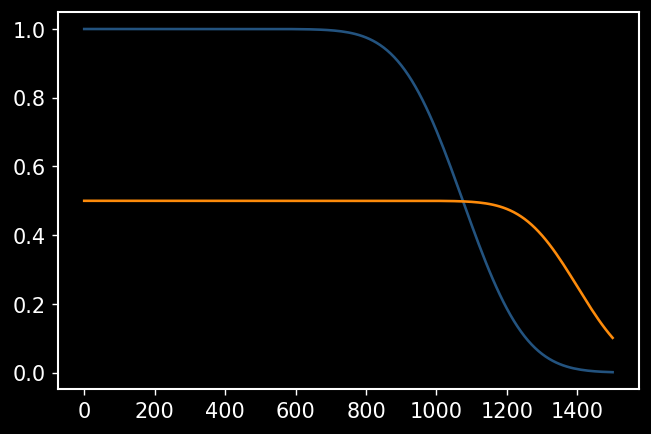

In [122]:
fig, ax = plt.subplots(dpi=125)
ax.plot(t,prob_reacting_making)
ax.plot(t,prob_gamble_making*0.5)


# Starting Simple

The problem is to max{0.5, 1.0*P($\alpha$ = 1|t)}, where $\alpha$ = 1 means the agent has gone.

- This is assuming people can respond instantly with no delay... what's the probability that the agent will go sometime before 1500

In [123]:
agent_mean, agent_std = 1200,200
prob_agent_goes = stats.norm.cdf(1500,agent_mean,agent_std)
prob_gamble_making = 1.0
prob_react_making = 1.0
exp_reward_react = 1.0 * prob_agent_goes * prob_react_making
exp_reward_gamble = 0.5 * prob_gamble_making

The problem comes when you won't be able to react 50% of the time... however, we can adjust our strategy online, waiting and catching the early agent trials while stopping well before the end

In [124]:
timesteps = np.arange(0,1500,10)
prob_event = np.zeros(len(timesteps))
i=-1
for t in timesteps:
    i+=1
    prob_event[i] = stats.norm.cdf(t,agent_mean,agent_std)
    

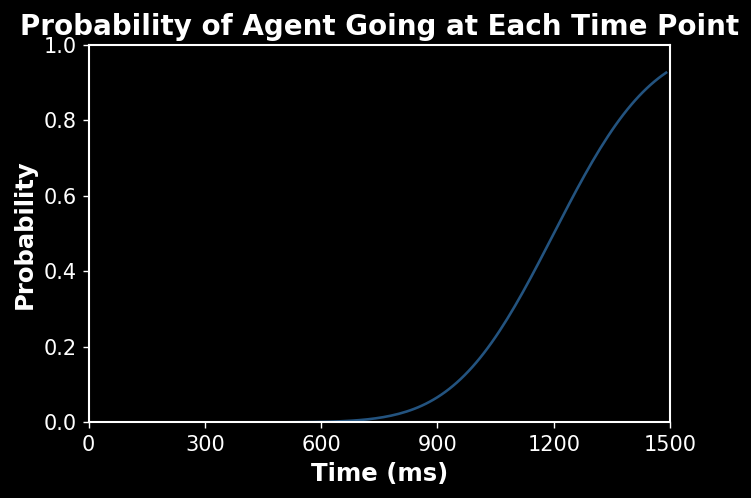

In [125]:
fig,ax = plt.subplots(dpi =125)
ax.plot(timesteps, prob_event)
ax.set_xlim(0,1500)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title('Probability of Agent Going at Each Time Point')
plt.show()

# Different way

Thinking about it in terms of the reward for each decision time selection, rather than the x-axis actually being time

This way is when there's no time constraint

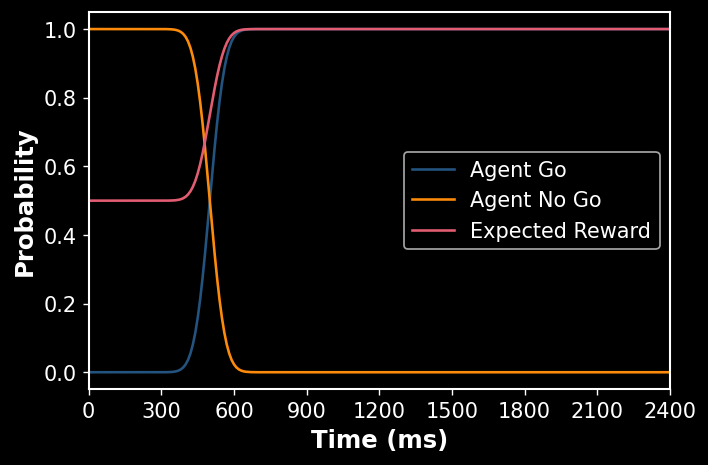

In [126]:
agent_mean,agent_std = 500,50
timesteps = np.arange(0,2500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
react_reward = 1.0
gamble_reward = 0.5
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    expected_reward[i] = gamble_reward*prob_agent_no_go[i] + react_reward*prob_agent_go[i]
    
fig,ax = plt.subplots(dpi =125)
ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps,expected_reward, label = 'Expected Reward')
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,2500,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

Now add in time constraint (aka multiply each piece of the expected reward by the probability of making it)

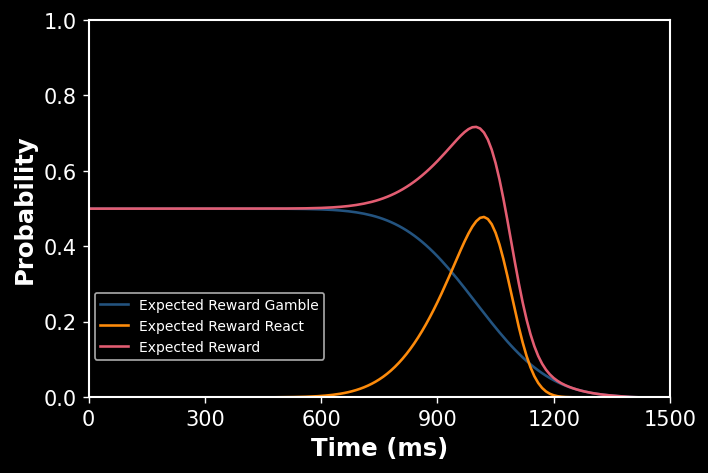

100


In [127]:
agent_mean,agent_std = 1000,150
timesteps = np.arange(0,1500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_react_making = np.zeros(len(timesteps))
prob_gamble_making = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 20
react_reward = 1.0
gamble_reward = 0.5
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_react_making[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_gamble_making[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    expected_reward_gamble[i] = (gamble_reward*prob_agent_no_go[i])*prob_gamble_making[i]
    expected_reward_react[i] = (react_reward*prob_agent_go[i])*prob_react_making[i]*B
    expected_reward[i] = expected_reward_gamble[i] + expected_reward_react[i]
    
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
# ax.plot(timesteps, prob_react_making, label = 'Prob React Make')
# ax.plot(timesteps, prob_gamble_making, label =  'Prob Gamble Make')
ax.plot(timesteps,expected_reward_gamble, label = 'Expected Reward Gamble')
ax.plot(timesteps,expected_reward_react, label = 'Expected Reward React')
ax.plot(timesteps,expected_reward, label = 'Expected Reward')

ax.set_ylim(0,1)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

print(np.argmax(expected_reward))

This is the expected reward for a certain decision time

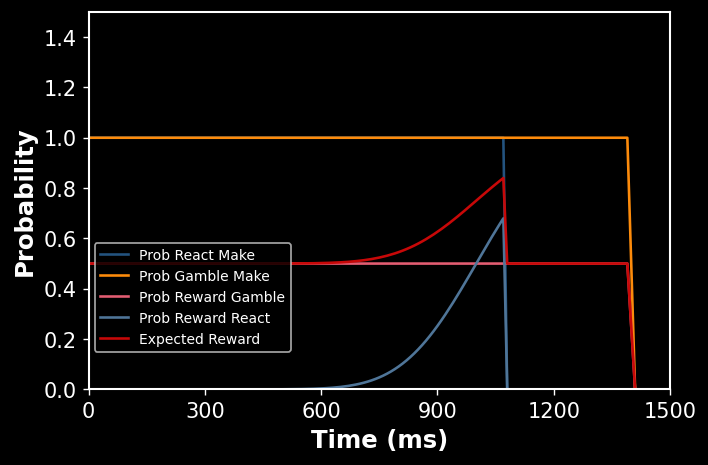

0


In [131]:
agent_mean,agent_std = 1000,150
timesteps = np.arange(0,1500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_react_making = np.zeros(len(timesteps))
prob_gamble_making = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 20

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_react_making[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_gamble_making[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_gamble_making[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i])*prob_react_making[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
    expected_reward_gamble
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps, prob_react_making, label = 'Prob React Make')
ax.plot(timesteps, prob_gamble_making, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
ax.plot(timesteps,prob_reward, label = 'Expected Reward')

ax.set_ylim(0,1.5)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

print(np.argmax(expected_reward))

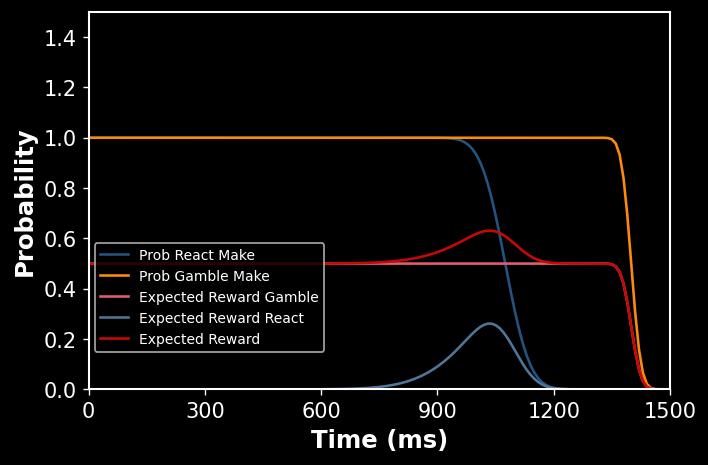

In [129]:
agent_mean,agent_std = 1100,150
timesteps = np.arange(0,1500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_react_making = np.zeros(len(timesteps))
prob_gamble_making = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 20

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_react_making[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_gamble_making[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_gamble_making[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i])*prob_react_making[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps, prob_react_making, label = 'Prob React Make')
ax.plot(timesteps, prob_gamble_making, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reward_gamble, label = 'Expected Reward Gamble')
ax.plot(timesteps,prob_reward_react, label = 'Expected Reward React')
ax.plot(timesteps,prob_reward, label = 'Expected Reward')

ax.set_ylim(0,1.5)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

Expected Reward for reach time
- Just need to remove the prob of reacting and mkaing and prob gambling and making

In [ ]:
agent_mean,agent_std = 1000,150
timesteps = np.arange(0,1500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_react_making = np.zeros(len(timesteps))
prob_gamble_making = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 20

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_react_making[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_gamble_making[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_gamble_making[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i])*prob_react_making[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
    expected_reward_gamble
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps, prob_react_making, label = 'Prob React Make')
ax.plot(timesteps, prob_gamble_making, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
ax.plot(timesteps,prob_reward, label = 'Expected Reward')

ax.set_ylim(0,1.5)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

print(np.argmax(expected_reward))

I have a nice framework, now I need to do this optimal stopping style where I make a decision at every time step 
- Maybe multiply the expected reward function at each time step by the probability that I will actually select time T given i choose time U

In [130]:
expected_reward_gamble

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])